# Create basics infos over DSAS Table

In [1]:
import numpy as np
import pandas as pd

In [2]:
# Path to your CSV file
csv_path = r"C:\coding\arctic\paper1\Notebook\Sanity\test\DSAS_clusters129G.csv"

# Read the CSV
df = pd.read_csv(csv_path)

# Quick sanity check
print(df.shape)
df.head()


(38812, 23)


,track_id,ClusterSize,bias_tolerance,gt_family,cluster_id,NSM,SCE,EPR,LRR,LR2,...,ClusterTemporalSpanYears,ValidRegression,angle_deg,center_lat,center_lon,first_date,last_date,initial_cycles,used_cycles,used_cycles_cluster
0,129,6.0,0.25,gt1,9.0,-84.0,-84.0,-21.20,NaN,NaN,...,3.98,False,87.29,70.880179,-153.889805,2019-04-06,2023-03-29,29.0,13.0,3.0
1,129,6.0,0.25,gt1,26.0,-91.0,-91.0,-19.19,-16.62,0.93,...,4.73,True,79.00,70.880287,-153.887290,2019-04-06,2023-12-27,29.0,13.0,4.0
2,129,6.0,0.25,gt1,17.0,1.0,-1.0,NaN,NaN,NaN,...,0.25,False,78.71,70.880318,-153.886551,2020-01-04,2020-04-03,29.0,13.0,2.0
3,129,6.0,0.25,gt1,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,False,87.09,70.880201,-153.889296,2020-04-03,2020-04-03,29.0,13.0,1.0
4,129,6.0,0.25,gt1,21.0,NaN,NaN,NaN,NaN,NaN,...,NaN,False,79.00,70.880274,-153.887596,2021-07-02,2021-07-02,29.0,13.0,1.0


In [3]:
# --- Column inspection ---
print("SHAPE:", df.shape)

summary = pd.DataFrame({
    "dtype": df.dtypes,
    "non_null": df.notna().sum(),
    "nulls": df.isna().sum(),
})
summary["null_pct"] = (summary["nulls"] / len(df)).round(4)
summary["n_unique"] = df.nunique(dropna=True)

# Show everything nicely sorted (most missing first)
summary = summary.sort_values(["null_pct", "n_unique"], ascending=[False, True])

display(summary)

print("\nCOLUMNS:")
print(list(df.columns))


SHAPE: (38812, 23)


,dtype,non_null,nulls,null_pct,n_unique
LR2,float64,21441,17371,0.4476,101
LRR,float64,21441,17371,0.4476,3027
LSE,float64,21441,17371,0.4476,3523
LCI,float64,21441,17371,0.4476,3986
EPR,float64,27589,11223,0.2892,2590
ClusterTemporalSpanYears,float64,33597,5215,0.1344,29
TemporalSpan_days,float64,33597,5215,0.1344,43
SCE,float64,33597,5215,0.1344,410
NSM,float64,33597,5215,0.1344,540
ValidRegression,bool,38812,0,0.0000,2



COLUMNS:
['track_id', 'ClusterSize', 'bias_tolerance', 'gt_family', 'cluster_id', 'NSM', 'SCE', 'EPR', 'LRR', 'LR2', 'LSE', 'LCI', 'TemporalSpan_days', 'ClusterTemporalSpanYears', 'ValidRegression', 'angle_deg', 'center_lat', 'center_lon', 'first_date', 'last_date', 'initial_cycles', 'used_cycles', 'used_cycles_cluster']


In [4]:
metrics = ["NSM", "SCE", "EPR", "LRR"]

# --- 1) Coerce to numeric (keeps original df columns, but ensures they are numbers) ---
for c in metrics:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# --- 2) Basic health check: missing + inf + stats ---
print("=== METRIC HEALTH CHECK ===")
for c in metrics:
    s = df[c]
    n = len(df)
    n_null = s.isna().sum()
    n_inf = np.isinf(s).sum()
    print(f"\n{c}:")
    print(f"  dtype: {s.dtype}")
    print(f"  nulls: {n_null}/{n} ({n_null/n:.2%})")
    print(f"  inf:   {n_inf}/{n} ({n_inf/n:.2%})")
    print(f"  min/1%/50%/99%/max: "
          f"{s.min():.3f} / {s.quantile(0.01):.3f} / {s.median():.3f} / {s.quantile(0.99):.3f} / {s.max():.3f}")

# --- 3) Show extremes (top/bottom N) ---
N = 15
key_cols = ["track_id","gt_family","ClusterSize","bias_tolerance","cluster_id",
            "TemporalSpan_days","ClusterTemporalSpanYears","ValidRegression",
            "first_date","last_date","angle_deg","center_lat","center_lon"]

print("\n=== EXTREMES (BOTTOM) ===")
for c in metrics:
    print(f"\n{c} bottom {N}:")
    display(df[key_cols + [c]].sort_values(c, ascending=True).head(N))

print("\n=== EXTREMES (TOP) ===")
for c in metrics:
    print(f"\n{c} top {N}:")
    display(df[key_cols + [c]].sort_values(c, ascending=False).head(N))

# --- 4) Flag suspicious rows with simple rules (tweak thresholds as needed) ---
# Notes:
# - SCE should be >= 0 in most shoreline-change definitions.
# - NSM is distance between oldest and newest shoreline: could be +/- but absurd magnitudes are suspicious.
# - EPR and LRR are rates; absurd magnitudes often mean bad geometry/time span.
sus = pd.Series(False, index=df.index)

sus |= df["SCE"] > 0
sus |= df["TemporalSpan_days"] <= 0
sus |= df["ClusterTemporalSpanYears"] <= 0

# Rate explosions often happen when timespan is tiny
sus |= (df["TemporalSpan_days"] < 365) & (df["EPR"].abs() > 50)
sus |= (df["TemporalSpan_days"] < 365) & (df["LRR"].abs() > 50)

# General “way too large” guards (edit to fit your study area expectations)
sus |= df["NSM"].abs() > 200
sus |= df["SCE"].abs() > 200
sus |= df["EPR"].abs() > 50
sus |= df["LRR"].abs() > 50

sus_df = df.loc[sus, key_cols + metrics].copy()

print(f"\n=== SUSPICIOUS ROWS FOUND: {len(sus_df)} ===")
display(sus_df.sort_values(["track_id","gt_family","ClusterSize","bias_tolerance","cluster_id"]).head(20))


=== METRIC HEALTH CHECK ===

NSM:
  dtype: float64
  nulls: 5215/38812 (13.44%)
  inf:   0/38812 (0.00%)
  min/1%/50%/99%/max: -557.000 / -275.000 / -1.000 / 254.000 / 559.000

SCE:
  dtype: float64
  nulls: 5215/38812 (13.44%)
  inf:   0/38812 (0.00%)
  min/1%/50%/99%/max: -559.000 / -399.000 / -25.000 / -1.000 / 0.000

EPR:
  dtype: float64
  nulls: 11223/38812 (28.92%)
  inf:   0/38812 (0.00%)
  min/1%/50%/99%/max: -338.200 / -85.730 / -0.630 / 99.331 / 397.950

LRR:
  dtype: float64
  nulls: 17371/38812 (44.76%)
  inf:   0/38812 (0.00%)
  min/1%/50%/99%/max: -347.460 / -71.022 / -0.500 / 76.102 / 369.070

=== EXTREMES (BOTTOM) ===

NSM bottom 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,NSM
6960,335,gt2,6.0,1.00,20.0,635.0,1.74,False,2022-04-14 00:00:00,2024-01-09 00:00:00,88.04,70.495074,-150.521064,-557.0
6948,335,gt2,6.0,0.75,20.0,635.0,1.74,False,2022-04-14 00:00:00,2024-01-09 00:00:00,88.04,70.495074,-150.521064,-557.0
6936,335,gt2,6.0,0.50,20.0,635.0,1.74,False,2022-04-14 00:00:00,2024-01-09 00:00:00,88.04,70.495074,-150.521064,-557.0
7059,335,gt2,42.0,0.25,25.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,87.98,70.495071,-150.520978,-490.0
7014,335,gt2,18.0,0.25,21.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,88.07,70.495062,-150.520773,-490.0
7051,335,gt2,36.0,0.25,25.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,88.00,70.495071,-150.520978,-490.0
28446,586,gt1,6.0,0.25,10.0,817.0,2.24,False,2022-04-30 00:00:00,2024-07-25 00:00:00,38.25,70.203528,-147.656041,-477.0
24877,396,gt1,12.0,1.00,15.0,1453.0,3.98,True,2019-04-24 00:00:00,2023-04-16 00:00:00,55.23,70.384941,-151.253648,-443.0
24861,396,gt1,12.0,0.75,15.0,1453.0,3.98,True,2019-04-24 00:00:00,2023-04-16 00:00:00,55.23,70.384941,-151.253648,-443.0
24845,396,gt1,12.0,0.50,15.0,1453.0,3.98,True,2019-04-24 00:00:00,2023-04-16 00:00:00,55.23,70.384941,-151.253648,-443.0



SCE bottom 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,SCE
13327,1051,gt1,24.0,1.00,13.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.40,69.849283,-142.112068,-559.0
13296,1051,gt1,24.0,0.25,20.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.88,69.849290,-142.112198,-559.0
13392,1051,gt1,36.0,1.00,13.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.36,69.849283,-142.112068,-559.0
13259,1051,gt1,18.0,0.50,16.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.54,69.849280,-142.111980,-559.0
13149,1051,gt1,6.0,0.75,13.0,635.0,1.74,True,2019-06-06 00:00:00,2021-03-02 00:00:00,56.47,69.849283,-142.112068,-559.0
13326,1051,gt1,24.0,1.00,20.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.88,69.849290,-142.112198,-559.0
13344,1051,gt1,30.0,0.50,20.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.87,69.849290,-142.112199,-559.0
13379,1051,gt1,36.0,0.50,19.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.46,69.849273,-142.111816,-559.0
13165,1051,gt1,6.0,1.00,13.0,635.0,1.74,True,2019-06-06 00:00:00,2021-03-02 00:00:00,56.47,69.849283,-142.112068,-559.0
13361,1051,gt1,30.0,1.00,19.0,1180.0,3.23,True,2019-06-06 00:00:00,2022-08-29 00:00:00,56.46,69.849273,-142.111816,-559.0



EPR bottom 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,EPR
35161,1097,gt2,6.0,0.75,24.0,454.0,1.24,True,2021-03-05 00:00:00,2022-06-02 00:00:00,77.03,70.366242,-148.491493,-338.20
24194,327,gt2,42.0,0.25,39.0,454.0,1.24,False,2023-07-11 00:00:00,2024-10-07 00:00:00,33.13,70.455976,-150.262884,-333.36
24196,327,gt2,42.0,0.25,36.0,454.0,1.24,False,2023-07-11 00:00:00,2024-10-07 00:00:00,33.18,70.455959,-150.263306,-333.36
24116,327,gt2,36.0,0.25,36.0,454.0,1.24,False,2023-07-11 00:00:00,2024-10-07 00:00:00,33.17,70.455959,-150.263306,-333.36
6948,335,gt2,6.0,0.75,20.0,635.0,1.74,False,2022-04-14 00:00:00,2024-01-09 00:00:00,88.04,70.495074,-150.521064,-320.41
6936,335,gt2,6.0,0.50,20.0,635.0,1.74,False,2022-04-14 00:00:00,2024-01-09 00:00:00,88.04,70.495074,-150.521064,-320.41
6960,335,gt2,6.0,1.00,20.0,635.0,1.74,False,2022-04-14 00:00:00,2024-01-09 00:00:00,88.04,70.495074,-150.521064,-320.41
7059,335,gt2,42.0,0.25,25.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,87.98,70.495071,-150.520978,-281.58
7051,335,gt2,36.0,0.25,25.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,88.00,70.495071,-150.520978,-281.58
7014,335,gt2,18.0,0.25,21.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,88.07,70.495062,-150.520773,-281.58



LRR bottom 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,LRR
35161,1097,gt2,6.0,0.75,24.0,454.0,1.24,True,2021-03-05 00:00:00,2022-06-02 00:00:00,77.03,70.366242,-148.491493,-347.46
7059,335,gt2,42.0,0.25,25.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,87.98,70.495071,-150.520978,-289.53
7051,335,gt2,36.0,0.25,25.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,88.00,70.495071,-150.520978,-289.53
7014,335,gt2,18.0,0.25,21.0,636.0,1.74,True,2022-10-12 00:00:00,2024-07-09 00:00:00,88.07,70.495062,-150.520773,-289.53
6418,281,gt1,12.0,0.50,14.0,454.0,1.24,True,2022-10-09 00:00:00,2024-01-06 00:00:00,71.37,70.100261,-143.721668,-176.19
6432,281,gt1,12.0,0.75,14.0,454.0,1.24,True,2022-10-09 00:00:00,2024-01-06 00:00:00,71.37,70.100261,-143.721668,-176.19
6446,281,gt1,12.0,1.00,14.0,454.0,1.24,True,2022-10-09 00:00:00,2024-01-06 00:00:00,71.37,70.100261,-143.721668,-176.19
20599,190,gt1,12.0,0.50,4.0,635.0,1.74,True,2021-07-06 00:00:00,2023-04-02 00:00:00,30.85,71.062694,-154.741793,-169.02
5130,144,gt3,24.0,0.25,53.0,636.0,1.74,True,2019-04-07 00:00:00,2021-01-02 00:00:00,64.76,70.215921,-147.746381,-155.52
5050,144,gt3,18.0,0.25,53.0,636.0,1.74,True,2019-04-07 00:00:00,2021-01-02 00:00:00,64.73,70.215921,-147.746381,-155.52



=== EXTREMES (TOP) ===

NSM top 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,NSM
13149,1051,gt1,6.0,0.75,13.0,635.0,1.74,True,2019-06-06 00:00:00,2021-03-02 00:00:00,56.47,69.849283,-142.112068,559.0
13165,1051,gt1,6.0,1.00,13.0,635.0,1.74,True,2019-06-06 00:00:00,2021-03-02 00:00:00,56.47,69.849283,-142.112068,559.0
13133,1051,gt1,6.0,0.50,13.0,635.0,1.74,True,2019-06-06 00:00:00,2021-03-02 00:00:00,56.47,69.849283,-142.112068,559.0
13214,1051,gt1,12.0,0.75,17.0,181.0,0.50,False,2019-06-06 00:00:00,2019-12-04 00:00:00,56.52,69.849277,-142.111924,531.0
13198,1051,gt1,12.0,0.50,17.0,181.0,0.50,False,2019-06-06 00:00:00,2019-12-04 00:00:00,56.52,69.849277,-142.111924,531.0
13117,1051,gt1,6.0,0.25,13.0,181.0,0.50,False,2019-06-06 00:00:00,2019-12-04 00:00:00,56.47,69.849283,-142.112068,531.0
13230,1051,gt1,12.0,1.00,17.0,181.0,0.50,False,2019-06-06 00:00:00,2019-12-04 00:00:00,56.52,69.849277,-142.111924,531.0
34679,1043,gt2,30.0,0.25,37.0,454.0,1.24,True,2019-12-04 00:00:00,2021-03-02 00:00:00,23.03,69.640261,-141.393345,495.0
26222,449,gt1,30.0,0.75,23.0,1544.0,4.23,True,2019-10-26 00:00:00,2024-01-17 00:00:00,30.28,70.560537,-151.945563,441.0
26277,449,gt1,36.0,0.25,27.0,1544.0,4.23,True,2019-10-26 00:00:00,2024-01-17 00:00:00,30.11,70.560521,-151.945946,441.0



SCE top 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,SCE
24290,342,gt1,6.0,0.75,12.0,272.0,0.74,False,2022-04-14 00:00:00,2023-01-11 00:00:00,84.41,70.017075,-144.470146,0.0
20985,205,gt1,6.0,0.50,14.0,90.0,0.25,False,2020-01-09 00:00:00,2020-04-08 00:00:00,57.37,70.405604,-148.770735,0.0
24302,342,gt1,6.0,1.00,12.0,272.0,0.74,False,2022-04-14 00:00:00,2023-01-11 00:00:00,84.41,70.017075,-144.470146,0.0
33841,967,gt3,36.0,0.25,51.0,545.0,1.49,False,2023-05-23 00:00:00,2024-11-18 00:00:00,69.72,70.183193,-146.440980,0.0
38042,1226,gt3,18.0,0.75,43.0,545.0,1.49,True,2019-12-16 00:00:00,2021-06-13 00:00:00,67.16,70.072946,-143.799860,0.0
33828,967,gt3,30.0,1.00,51.0,545.0,1.49,False,2023-05-23 00:00:00,2024-11-18 00:00:00,69.74,70.183193,-146.440980,0.0
24278,342,gt1,6.0,0.50,12.0,272.0,0.74,False,2022-04-14 00:00:00,2023-01-11 00:00:00,84.41,70.017075,-144.470146,0.0
24266,342,gt1,6.0,0.25,12.0,272.0,0.74,False,2022-04-14 00:00:00,2023-01-11 00:00:00,84.41,70.017075,-144.470146,0.0
35481,1112,gt2,12.0,0.75,21.0,1090.0,2.98,False,2021-12-04 00:00:00,2024-11-28 00:00:00,83.22,70.056610,-142.910404,0.0
33812,967,gt3,30.0,0.75,51.0,545.0,1.49,False,2023-05-23 00:00:00,2024-11-18 00:00:00,69.74,70.183193,-146.440980,0.0



EPR top 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,EPR
34679,1043,gt2,30.0,0.25,37.0,454.0,1.24,True,2019-12-04 00:00:00,2021-03-02 00:00:00,23.03,69.640261,-141.393345,397.95
14949,1128,gt2,42.0,1.00,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,325.85
14913,1128,gt2,36.0,0.50,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,325.85
14871,1128,gt2,24.0,0.75,17.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.71,70.404279,-160.675856,325.85
14865,1128,gt2,24.0,0.50,17.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.71,70.404279,-160.675856,325.85
14852,1128,gt2,18.0,1.00,17.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,39.88,70.404279,-160.675856,325.85
14883,1128,gt2,30.0,0.25,16.0,454.0,1.24,False,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,325.85
14845,1128,gt2,18.0,0.75,17.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,39.88,70.404279,-160.675856,325.85
14838,1128,gt2,18.0,0.50,17.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,39.88,70.404279,-160.675856,325.85
14823,1128,gt2,12.0,1.00,17.0,454.0,1.24,False,2019-06-11 00:00:00,2020-09-07 00:00:00,52.92,70.404279,-160.675856,325.85



LRR top 15:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,LRR
34679,1043,gt2,30.0,0.25,37.0,454.0,1.24,True,2019-12-04 00:00:00,2021-03-02 00:00:00,23.03,69.640261,-141.393345,369.07
14838,1128,gt2,18.0,0.50,17.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,39.88,70.404279,-160.675856,296.46
14889,1128,gt2,30.0,0.50,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14949,1128,gt2,42.0,1.00,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14943,1128,gt2,42.0,0.75,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14937,1128,gt2,42.0,0.50,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14925,1128,gt2,36.0,1.00,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14919,1128,gt2,36.0,0.75,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14913,1128,gt2,36.0,0.50,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46
14901,1128,gt2,30.0,1.00,16.0,454.0,1.24,True,2019-06-11 00:00:00,2020-09-07 00:00:00,37.83,70.404286,-160.676014,296.46



=== SUSPICIOUS ROWS FOUND: 3541 ===


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,NSM,SCE,EPR,LRR
18427,7,gt3,6.0,0.25,64.0,1090.0,2.98,False,2019-12-27 00:00:00,2022-12-21 00:00:00,65.39,70.560271,-152.031639,196.0,-196.0,65.67,NaN
18430,7,gt3,6.0,0.25,65.0,454.0,1.24,False,2023-09-19 00:00:00,2024-12-16 00:00:00,62.54,70.560251,-152.032075,182.0,-182.0,146.69,NaN
18439,7,gt3,6.0,0.50,64.0,1090.0,2.98,False,2019-12-27 00:00:00,2022-12-21 00:00:00,65.39,70.560271,-152.031639,196.0,-196.0,65.67,NaN
18442,7,gt3,6.0,0.50,65.0,454.0,1.24,False,2023-09-19 00:00:00,2024-12-16 00:00:00,62.54,70.560251,-152.032075,182.0,-182.0,146.69,NaN
18451,7,gt3,6.0,0.75,64.0,1090.0,2.98,False,2019-12-27 00:00:00,2022-12-21 00:00:00,65.39,70.560271,-152.031639,196.0,-196.0,65.67,NaN
18454,7,gt3,6.0,0.75,65.0,454.0,1.24,False,2023-09-19 00:00:00,2024-12-16 00:00:00,62.54,70.560251,-152.032075,182.0,-182.0,146.69,NaN
18463,7,gt3,6.0,1.00,64.0,1090.0,2.98,False,2019-12-27 00:00:00,2022-12-21 00:00:00,65.39,70.560271,-152.031639,196.0,-196.0,65.67,NaN
18466,7,gt3,6.0,1.00,65.0,454.0,1.24,False,2023-09-19 00:00:00,2024-12-16 00:00:00,62.54,70.560251,-152.032075,182.0,-182.0,146.69,NaN
18738,7,gt3,30.0,0.25,77.0,1453.0,3.98,True,2019-12-27 00:00:00,2023-12-19 00:00:00,82.32,70.560379,-152.029058,255.0,-256.0,64.12,59.29
18762,7,gt3,30.0,0.50,77.0,1453.0,3.98,True,2019-12-27 00:00:00,2023-12-19 00:00:00,82.32,70.560379,-152.029058,255.0,-256.0,64.12,59.29


In [5]:
# Assumes df already exists, and pandas/numpy were already imported earlier.

metrics = ["NSM", "SCE", "EPR", "LRR"]

# Make sure they are numeric (keeps NaN if something can't be parsed)
for c in metrics:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# Ensure angle is numeric too
df["angle_deg"] = pd.to_numeric(df["angle_deg"], errors="coerce")

# -------------------------
# SUSPICIOUS RULES
# -------------------------
sus = pd.Series(False, index=df.index)

# Time sanity
sus |= df["TemporalSpan_days"].isna() | (df["TemporalSpan_days"] <= 0)
sus |= df["ClusterTemporalSpanYears"].isna() | (df["ClusterTemporalSpanYears"] <= 0)

# NSM sign rule (your requirement)
sus |= df["NSM"].isna() | (df["NSM"] >= 0)

# Angle filter (your requirement)
sus |= df["angle_deg"].isna() | (df["angle_deg"] < 60)

# Magnitude guards (your thresholds)
sus |= df["NSM"].abs() > 200
sus |= df["SCE"].abs() > 200
sus |= df["EPR"].abs() > 50
sus |= df["LRR"].abs() > 50

# Optional: flag infinities if any snuck in
sus |= np.isinf(df[metrics]).any(axis=1)

# -------------------------
# ADD REASONS (so you can see *why* each row was flagged)
# -------------------------
rules = {
    "TemporalSpan_days <= 0 or missing": df["TemporalSpan_days"].isna() | (df["TemporalSpan_days"] <= 0),
    "ClusterTemporalSpanYears <= 0 or missing": df["ClusterTemporalSpanYears"].isna() | (df["ClusterTemporalSpanYears"] <= 0),
    "NSM missing": df["NSM"].isna(),
    "NSM >= 0 (should be negative)": df["NSM"] >= 0,
    "angle_deg missing": df["angle_deg"].isna(),
    "angle_deg < 60": df["angle_deg"] < 60,
    "|NSM| > 200": df["NSM"].abs() > 200,
    "|SCE| > 200": df["SCE"].abs() > 200,
    "|EPR| > 50": df["EPR"].abs() > 50,
    "|LRR| > 50": df["LRR"].abs() > 50,
    "Has inf": np.isinf(df[metrics]).any(axis=1),
}

flags = pd.DataFrame(rules)
df["suspicious"] = sus
df["suspicious_reason"] = flags.apply(lambda r: ", ".join(r.index[r.values]), axis=1)

print("SUSPICIOUS ROWS:", int(df["suspicious"].sum()))

cols_show = [
    "track_id","gt_family","ClusterSize","bias_tolerance","cluster_id",
    "TemporalSpan_days","ClusterTemporalSpanYears","ValidRegression",
    "first_date","last_date","angle_deg","NSM","SCE","EPR","LRR","suspicious_reason"
]
display(df.loc[df["suspicious"], cols_show].head(20))


SUSPICIOUS ROWS: 29761


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,NSM,SCE,EPR,LRR,suspicious_reason
2,129,gt1,6.0,0.25,17.0,90.0,0.25,False,2020-01-04,2020-04-03,78.71,1.0,-1.0,NaN,NaN,NSM >= 0 (should be negative)
3,129,gt1,6.0,0.25,3.0,NaN,NaN,False,2020-04-03,2020-04-03,87.09,NaN,NaN,NaN,NaN,"TemporalSpan_days <= 0 or missing, ClusterTemp..."
4,129,gt1,6.0,0.25,21.0,NaN,NaN,False,2021-07-02,2021-07-02,79.00,NaN,NaN,NaN,NaN,"TemporalSpan_days <= 0 or missing, ClusterTemp..."
10,129,gt2,6.0,0.25,34.0,NaN,NaN,False,2021-04-02,2021-04-02,83.88,NaN,NaN,NaN,NaN,"TemporalSpan_days <= 0 or missing, ClusterTemp..."
11,129,gt2,6.0,0.25,43.0,90.0,0.25,False,2020-01-04,2020-04-03,84.00,2.0,-2.0,NaN,NaN,NSM >= 0 (should be negative)
17,129,gt3,6.0,0.25,69.0,90.0,0.25,False,2020-01-04,2020-04-03,83.58,1.0,-1.0,NaN,NaN,NSM >= 0 (should be negative)
20,129,gt1,6.0,0.50,17.0,90.0,0.25,False,2020-01-04,2020-04-03,78.71,1.0,-1.0,NaN,NaN,NSM >= 0 (should be negative)
28,129,gt2,6.0,0.50,34.0,NaN,NaN,False,2021-04-02,2021-04-02,83.88,NaN,NaN,NaN,NaN,"TemporalSpan_days <= 0 or missing, ClusterTemp..."
29,129,gt2,6.0,0.50,43.0,90.0,0.25,False,2020-01-04,2020-04-03,84.00,2.0,-2.0,NaN,NaN,NSM >= 0 (should be negative)
35,129,gt3,6.0,0.50,69.0,90.0,0.25,False,2020-01-04,2020-04-03,83.58,1.0,-1.0,NaN,NaN,NSM >= 0 (should be negative)


In [6]:
# Keep only non-suspicious rows
df_clean = df.loc[~df["suspicious"]].copy()

print("Original shape:", df.shape)
print("Clean shape:   ", df_clean.shape)
print("Removed rows:  ", int(df["suspicious"].sum()))

# Optional: drop helper columns if you don't want them in the cleaned table
df_clean = df_clean.drop(columns=["suspicious", "suspicious_reason"], errors="ignore")

# Optional: save
# df_clean.to_csv("your_file_clean.csv", index=False)

df_clean.head()


Original shape: (38812, 25)
Clean shape:    (9051, 25)
Removed rows:   29761


,track_id,ClusterSize,bias_tolerance,gt_family,cluster_id,NSM,SCE,EPR,LRR,LR2,...,ClusterTemporalSpanYears,ValidRegression,angle_deg,center_lat,center_lon,first_date,last_date,initial_cycles,used_cycles,used_cycles_cluster
0,129,6.0,0.25,gt1,9.0,-84.0,-84.0,-21.20,NaN,NaN,...,3.98,False,87.29,70.880179,-153.889805,2019-04-06,2023-03-29,29.0,13.0,3.0
1,129,6.0,0.25,gt1,26.0,-91.0,-91.0,-19.19,-16.62,0.93,...,4.73,True,79.00,70.880287,-153.887290,2019-04-06,2023-12-27,29.0,13.0,4.0
5,129,6.0,0.25,gt1,24.0,-14.0,-14.0,-11.13,NaN,NaN,...,1.24,False,78.86,70.880268,-153.887735,2022-12-29,2024-03-27,29.0,13.0,2.0
6,129,6.0,0.25,gt2,30.0,-62.0,-62.0,-22.69,NaN,NaN,...,2.74,False,83.87,70.884446,-153.801884,2019-04-06,2021-12-30,25.0,12.0,2.0
7,129,6.0,0.25,gt2,41.0,-4.0,-4.0,NaN,NaN,NaN,...,0.50,False,83.93,70.884437,-153.802099,2024-06-25,2024-12-24,25.0,12.0,2.0


In [7]:
# Assumes df_clean already exists.
# Assumes pandas/numpy were already imported earlier.

metrics = ["NSM", "SCE", "EPR", "LRR"]

# Ensure numeric
for c in metrics:
    df_clean[c] = pd.to_numeric(df_clean[c], errors="coerce")

# Drop rows missing any metric for outlier screening (optional, but cleaner)
out_base = df_clean.dropna(subset=metrics).copy()

key_cols = [
    "track_id","gt_family","ClusterSize","bias_tolerance","cluster_id",
    "TemporalSpan_days","ClusterTemporalSpanYears","ValidRegression",
    "first_date","last_date","angle_deg","center_lat","center_lon"
]

# ------------------------------------------------------------
# 1) IQR method (per metric)
# ------------------------------------------------------------
iqr_flags = pd.DataFrame(index=out_base.index)

for c in metrics:
    q1 = out_base[c].quantile(0.25)
    q3 = out_base[c].quantile(0.75)
    iqr = q3 - q1
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    iqr_flags[c] = (out_base[c] < lo) | (out_base[c] > hi)

iqr_any = iqr_flags.any(axis=1)
print("IQR outliers (any metric):", int(iqr_any.sum()))

# Count by metric
print("\nIQR outlier counts by metric:")
display(iqr_flags.sum().sort_values(ascending=False))

# ------------------------------------------------------------
# 2) MAD-based robust z-score (per metric)
#    robust_z = 0.6745*(x - median)/MAD
#    common threshold: |z| > 3.5
# ------------------------------------------------------------
mad_flags = pd.DataFrame(index=out_base.index)
robust_z = pd.DataFrame(index=out_base.index)

for c in metrics:
    med = out_base[c].median()
    mad = (out_base[c] - med).abs().median()
    if mad == 0 or pd.isna(mad):
        # If MAD is 0, robust z-score can't be computed reliably
        robust_z[c] = np.nan
        mad_flags[c] = False
    else:
        robust_z[c] = 0.6745 * (out_base[c] - med) / mad
        mad_flags[c] = robust_z[c].abs() > 3.5

mad_any = mad_flags.any(axis=1)
print("MAD-z outliers (any metric):", int(mad_any.sum()))

print("\nMAD-z outlier counts by metric:")
display(mad_flags.sum().sort_values(ascending=False))

# ------------------------------------------------------------
# Show top outliers (pick one method)
# ------------------------------------------------------------
# Use MAD-z (usually better), falling back to IQR if robust_z is NaN-heavy
method = "mad"  # change to "iqr" if you prefer

if method == "mad":
    outliers = out_base.loc[mad_any].copy()
    # Score = max |robust z| across metrics
    outliers["outlier_score"] = robust_z.loc[outliers.index, metrics].abs().max(axis=1)
else:
    outliers = out_base.loc[iqr_any].copy()
    # Score = max distance beyond IQR bound (rough proxy using |x - median|)
    outliers["outlier_score"] = outliers[metrics].sub(outliers[metrics].median()).abs().max(axis=1)

print(f"\nShowing top 50 outliers using method = {method.upper()}:")
cols_show = key_cols + metrics + ["outlier_score"]
display(outliers[cols_show].sort_values("outlier_score", ascending=False).head(50))


IQR outliers (any metric): 995

IQR outlier counts by metric:


NSM    745
LRR    454
EPR    385
SCE    215
dtype: int64

MAD-z outliers (any metric): 1299

MAD-z outlier counts by metric:


NSM    1008
EPR     936
LRR     700
SCE     422
dtype: int64


Showing top 50 outliers using method = MAD:


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,center_lat,center_lon,NSM,SCE,EPR,LRR,outlier_score
21229,205,gt2,24.0,0.50,33.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,84.54,70.404685,-148.684215,-187.0,-187.0,-46.92,-37.61,14.754687
21329,205,gt2,30.0,0.75,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.56,70.404708,-148.684533,-187.0,-187.0,-46.93,-48.99,14.754687
21267,205,gt2,24.0,1.00,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.55,70.404709,-148.684532,-187.0,-187.0,-46.93,-48.99,14.754687
21269,205,gt2,24.0,1.00,33.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,84.54,70.404685,-148.684215,-187.0,-187.0,-46.92,-37.61,14.754687
21529,205,gt2,42.0,1.00,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.60,70.404707,-148.684536,-187.0,-187.0,-46.93,-32.97,14.754687
21308,205,gt2,30.0,0.50,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.56,70.404708,-148.684533,-187.0,-187.0,-46.93,-48.99,14.754687
21507,205,gt2,42.0,0.75,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.60,70.404707,-148.684536,-187.0,-187.0,-46.93,-32.97,14.754687
21485,205,gt2,42.0,0.50,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.60,70.404707,-148.684536,-187.0,-187.0,-46.93,-32.97,14.754687
21310,205,gt2,30.0,0.50,33.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,84.55,70.404685,-148.684215,-187.0,-187.0,-46.92,-35.55,14.754687
21247,205,gt2,24.0,0.75,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.55,70.404709,-148.684532,-187.0,-187.0,-46.93,-48.99,14.754687


In [8]:
# Assumes df_clean exists.

df_clean["LRR"] = pd.to_numeric(df_clean["LRR"], errors="coerce")

mask_impossible = df_clean["LRR"] < -30

n_total = len(df_clean)
n_impossible = int(mask_impossible.sum())
pct = (n_impossible / n_total) if n_total else 0

print(f"Total rows: {n_total}")
print(f"LRR < -30 (impossible): {n_impossible} ({pct:.2%})")

cols = [
    "track_id","gt_family","ClusterSize","bias_tolerance","cluster_id",
    "TemporalSpan_days","ClusterTemporalSpanYears","ValidRegression",
    "first_date","last_date","angle_deg","NSM","SCE","EPR","LRR"
]

display(
    df_clean.loc[mask_impossible, cols]
      .sort_values("LRR", ascending=True)   # most negative first
      .head(50)
)


Total rows: 9051
LRR < -30 (impossible): 122 (1.35%)


,track_id,gt_family,ClusterSize,bias_tolerance,cluster_id,TemporalSpan_days,ClusterTemporalSpanYears,ValidRegression,first_date,last_date,angle_deg,NSM,SCE,EPR,LRR
21185,205,gt2,18.0,1.00,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.53,-187.0,-187.0,-46.93,-48.99
21247,205,gt2,24.0,0.75,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.55,-187.0,-187.0,-46.93,-48.99
21162,205,gt2,18.0,0.75,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.53,-187.0,-187.0,-46.93,-48.99
21139,205,gt2,18.0,0.50,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.53,-187.0,-187.0,-46.93,-48.99
21267,205,gt2,24.0,1.00,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.55,-187.0,-187.0,-46.93,-48.99
21308,205,gt2,30.0,0.50,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.56,-187.0,-187.0,-46.93,-48.99
21329,205,gt2,30.0,0.75,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.56,-187.0,-187.0,-46.93,-48.99
21350,205,gt2,30.0,1.00,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.56,-187.0,-187.0,-46.93,-48.99
21227,205,gt2,24.0,0.50,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.55,-187.0,-187.0,-46.93,-48.99
21440,205,gt2,36.0,1.00,49.0,1453.0,3.98,True,2020-07-08 00:00:00,2024-06-30 00:00:00,82.58,-187.0,-187.0,-46.93,-47.41


In [9]:
df_clean["LRR"] = pd.to_numeric(df_clean["LRR"], errors="coerce")

mask_impossible = df_clean["LRR"] < -30

print("Before:", df_clean.shape)
print("Removing LRR < -30 rows:", int(mask_impossible.sum()))

df_clean2 = df_clean.loc[~mask_impossible].copy()

print("After: ", df_clean2.shape)

df_clean2.head()


Before: (9051, 23)
Removing LRR < -30 rows: 122
After:  (8929, 23)


,track_id,ClusterSize,bias_tolerance,gt_family,cluster_id,NSM,SCE,EPR,LRR,LR2,...,ClusterTemporalSpanYears,ValidRegression,angle_deg,center_lat,center_lon,first_date,last_date,initial_cycles,used_cycles,used_cycles_cluster
0,129,6.0,0.25,gt1,9.0,-84.0,-84.0,-21.20,NaN,NaN,...,3.98,False,87.29,70.880179,-153.889805,2019-04-06,2023-03-29,29.0,13.0,3.0
1,129,6.0,0.25,gt1,26.0,-91.0,-91.0,-19.19,-16.62,0.93,...,4.73,True,79.00,70.880287,-153.887290,2019-04-06,2023-12-27,29.0,13.0,4.0
5,129,6.0,0.25,gt1,24.0,-14.0,-14.0,-11.13,NaN,NaN,...,1.24,False,78.86,70.880268,-153.887735,2022-12-29,2024-03-27,29.0,13.0,2.0
6,129,6.0,0.25,gt2,30.0,-62.0,-62.0,-22.69,NaN,NaN,...,2.74,False,83.87,70.884446,-153.801884,2019-04-06,2021-12-30,25.0,12.0,2.0
7,129,6.0,0.25,gt2,41.0,-4.0,-4.0,NaN,NaN,NaN,...,0.50,False,83.93,70.884437,-153.802099,2024-06-25,2024-12-24,25.0,12.0,2.0


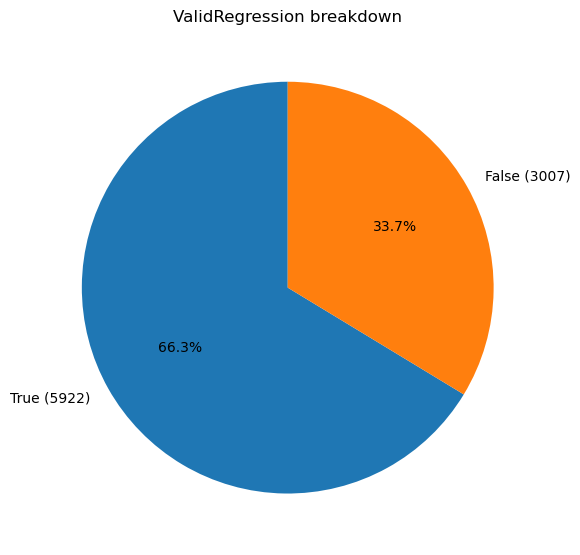

ValidRegression
True     5922
False    3007
Name: count, dtype: int64


In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# Pick the most recent cleaned table
data = df_clean2 if "df_clean2" in globals() else df_clean

# Normalize ValidRegression values (handles True/False, 1/0, "True"/"False", etc.)
vr = data["ValidRegression"]

# Map common string/number variants to True/False, keep NaN as "Missing"
mapped = (
    vr.replace({1: True, 0: False, "1": True, "0": False,
                "True": True, "False": False, "true": True, "false": False})
      .where(vr.notna(), other="Missing")
)

counts = mapped.value_counts(dropna=False)

plt.figure(figsize=(6, 6))
plt.pie(
    counts.values,
    labels=[f"{idx} ({val})" for idx, val in counts.items()],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("ValidRegression breakdown")
plt.tight_layout()
plt.show()

print(counts)


In [11]:
# Use the most recent cleaned table
data = df_clean2 if "df_clean2" in globals() else df_clean

n_unique = data["track_id"].nunique(dropna=True)
n_rows = len(data)

print(f"Rows: {n_rows}")
print(f"Unique track_id: {n_unique}")

Rows: 8929
Unique track_id: 129


In [12]:
data = df_clean2 if "df_clean2" in globals() else df_clean

n_unique_combo = data[["track_id","gt_family","cluster_id"]].dropna().drop_duplicates().shape[0]
print(f"Unique (track_id, gt_family, cluster_id): {n_unique_combo}")


Unique (track_id, gt_family, cluster_id): 1189


In [13]:
# Save df_clean2 to CSV (in your current working directory)
df_clean2.to_csv("retreat1.csv", index=False)


In [14]:
# pick only safe fields for shapefile output
keep = [
    "track_id","gt_family","ClusterSize","bias_tolerance","cluster_id",
    "center_lon","center_lat","angle_deg","NSM","SCE","EPR","LRR"
]

export_df = df_clean2[keep].copy()

# if you want dates, store as strings, not datetime
# export_df["first_date"] = df_clean2["first_date"].astype(str)
# export_df["last_date"]  = df_clean2["last_date"].astype(str)

export_df.to_csv(r"C:\coding\arctic\paper1\shp\Retreats1_safe.csv", index=False)
